In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile('movie_data.zip','r') as zip:
  zip.extractall()



In [12]:
# Check how many csv file is There

import os

list_of_files = os.listdir()
csv_files = [file_ for file_ in list_of_files if file_.endswith('.csv')]
total_csv_file = len(csv_files)
print(f'The total csv file count is = {total_csv_file} ')

The total csv file count is = 4 


In [14]:
#Read movies.csv file

import pandas as pd

movies_df = pd.read_csv('movies.csv')
movies_df.shape

(9742, 3)

In [15]:
#reading the ratings.csv file using pandas

rating_df = pd.read_csv('ratings.csv')
rating_df.shape

(100836, 4)

In [21]:
#calculate unique id in ratings.csv
len(rating_df['userId'].unique())


610

In [23]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [59]:
rating_df.sort_values('userId')

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
147,1,2329,5.0,964983263
148,1,2338,2.0,964983546
149,1,2353,5.0,964983861
150,1,2366,4.0,964982462
...,...,...,...,...
99963,610,6387,3.5,1479542038
99962,610,6383,2.5,1493846084
99961,610,6378,3.5,1493844983
99979,610,6708,3.5,1493847441


In [65]:
rating_df.groupby(['movieId','rating']).head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100828,610,163981,3.5,1493850155
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


In [43]:
df = pd.DataFrame(rating_df.groupby(['movieId']).sum())

In [48]:
df.head()

,userId,rating,timestamp
movieId,,,
1,65904,843.0,242914455479
2,36251,377.5,124938583322
3,14747,169.5,52265734386
4,1539,16.5,6290052048
5,14679,150.5,48640552594


In [67]:
#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
tags_df = pd.read_csv('tags.csv')
tags_df.head()


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [84]:
#get the Matrix, The (1999) movie id

matrix_id = movies_df[movies_df['title']=='Matrix, The (1999)']['movieId'].values[0]

In [92]:
#select all tags  for matrix the (1999)

matrix_all_tag = tags_df[tags_df['movieId']==matrix_id]['tag'].values[0:]
print(matrix_all_tag)




['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?**bold text**

In [93]:
#get the movie_id from movies.csv
terminator_movie_id = movies_df[movies_df['title']=='Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator_movie_id

589

In [98]:
#calculate average user rating for terminator2 movie from ratings dataframe using movie Id

terminator_average_rating = rating_df[rating_df['movieId']==terminator_movie_id]['rating'].mean()

print('The average rating for Terminator 2: Judgment Day (1991) is  = ',terminator_average_rating)

The average rating for Terminator 2: Judgment Day (1991) is  =  3.970982142857143


## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [99]:
#get movieid for Fight Club (1999) from movies_df

fight_club_id = movies_df[movies_df['title']=='Fight Club (1999)']['movieId'].values[0]

<Axes: ylabel='Frequency'>

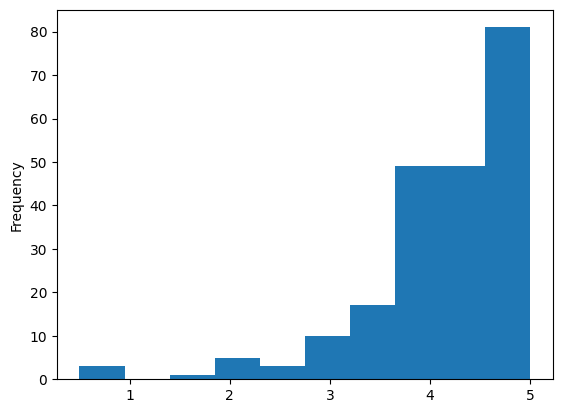

In [105]:
#analysis distribution for fight club

rating_df[rating_df['movieId']==fight_club_id]['rating'].plot(kind='hist')

## 1.fight club distribution left skewed distribution

## step 1 Group the user rating based on movieId

In [146]:
#apply aggregation function on top on the movieId group
df_ratings = rating_df.groupby(['movieId']).agg({'rating':['count','mean']})
df_ratings.columns = ['movie_rating_count', 'movie_rating_mean']


## 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.

In [149]:
#merge movies_df and df_ratings dataframe into one using INNER join method
movies_final_df = pd.merge(movies_df, df_ratings, on='movieId', how='inner')
movies_final_df.head()


,movieId,title,genres,movie_rating_count,movie_rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


# 3 . Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [156]:
Top_movies_final_df = movies_final_df[movies_final_df['movie_rating_count'] > 50]

##Which movie is the most popular based on  average user ratings?


In [163]:
Most_popular_movie = Top_movies_final_df[Top_movies_final_df['movie_rating_mean']==Top_movies_final_df['movie_rating_mean'].max()]['title'].values[0]
print('The Most Popular movie based on average user ratings is = ',Most_popular_movie)

The Most Popular movie based on average user ratings is =  Shawshank Redemption, The (1994)


## Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [177]:
top_5_movies_avg_rating = Top_movies_final_df['movie_rating_count'].sort_values(ascending=False)[0:5].values[0:5]


In [178]:
#print and get top 5 movies based on average rating

for i in range(0,5):
  top_movie = Top_movies_final_df[Top_movies_final_df['movie_rating_count']==top_5_movies_avg_rating[i]]['title'].values[0]
  print(top_movie)

Forrest Gump (1994)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)


## Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [235]:
sci_fi_movie_id = tags_df[tags_df['tag']==('sci-fi' or 'Sci-Fi')]['movieId'].values[:]



In [237]:
Top_movies_final_df[Top_movies_final_df['movieId']==tags_df[tags_df['tag']==('sci-fi' or 'Sci-Fi')]]

<ipython-input-237-5229f868874d>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Top_movies_final_df[Top_movies_final_df['movieId']==tags_df[tags_df['tag']==('sci-fi' or 'Sci-Fi')]]


,movieId,title,genres,movie_rating_count,movie_rating_mean
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8287,NaN,NaN,NaN,NaN,NaN
8354,NaN,NaN,NaN,NaN,NaN
8358,NaN,NaN,NaN,NaN,NaN
8457,NaN,NaN,NaN,NaN,NaN


In [227]:
sci_fi = {value: index for index, value in enumerate(sci_fi_movie_id.tolist())}

sci_fi.pop(27660)

1

In [228]:
Top_movies_final_df[Top_movies_final_df['movieId'] == int(260)]

,movieId,title,genres,movie_rating_count,movie_rating_mean
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076


In [229]:


# Iterate over the keys one by one
for key in sci_fi:
    if

      (Top_movies_final_df[Top_movies_final_df['movieId'] == int(key)]['title'].values[0]) !='':
      rating = Top_movies_final_df[Top_movies_final_df['movieId'] == int(key)]['movie_rating_count'].values[0]
      sci_fi[key] = rating
      print(rating)

73
251


IndexError: index 0 is out of bounds for axis 0 with size 0